In [410]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    log_loss,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    roc_curve,
    auc
)


 First few lines of code that follow are to import the dataset, seperate the labels from the dataset and cleaning the Dataset. 

In [411]:
pea_data = pd.read_csv('C:\\Users\\saksh\\Desktop\\sem2\\pea_data.csv',sep = ';')

In [412]:
labels = pea_data.lateness
pea_data.drop('lateness',inplace=True,axis=1)

In [413]:
pea_data.head(5)

,Unnamed: 0,order_weight_min,order_weight_aim,order_weight_max,customer_order_id,production_order_id,width,thickness,output_weight_target,material_sub_type,...,last_coil_delivered_date,total_downgrade_weight,hr_downgrade_weight,hrp_downgrade_weight,crfh_downgrade_weight,crfp_downgrade_weight,crca_downgrade_weight,hrgi_downgrade_weight,crgi_downgrade_weight,rework_weight
0,0,"97,9759521484375","65,3172988891602","199,580642700195",9718,10794,"1231,90002441406","2,1082000732421897","90,71847534179692",1,...,2017-11-30 20:11:22,"0,0","82,98936462402341","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
1,1,"408,23312377929705","22,6796188354492","24,9475803375244",3912,22825,"1219,19995117188","1,87960004806519","65,3172988891602",8,...,2018-01-01 00:58:49,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
2,2,"19,5951900482178","61,2349700927734","39,916130065918004",9118,10969,"1828,8000488281198","0,8636000156402591","54,431087493896506",3,...,2017-09-12 08:03:11,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
3,3,"81,64662170410159","163,29324340820298","498,951599121094",10904,26184,"1651,0","1,47319996356964","36,287391662597706",8,...,2018-04-25 06:52:15,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","15,7250003814697"
4,4,"1095,69775390625","45,3592376708984","42,909839630127",10433,18136,"1219,19995117188","12,4460000991821","181,436950683594",3,...,2017-09-09 16:24:56,"0,0","0,0","0,0","30,708679199218803","0,0","0,0","0,0","0,0","0,0"


The first problem we face is that columns that should be float are represented as strings.In these columns the numeric value are separated by commas instead of point. For an example look at the 'order_weight_min' column from the above table.So, We ll first select all the columns that are strings and remove the commas and replace them with Decimal points then finally convert them into floating values.

In [414]:
str_cols = pea_data.select_dtypes(include = ['object'])
str_cols.drop(['steel_grade_int_text_en','steel_grade_group_text','value_name'],inplace=True,axis=1)
str_cols.drop(['due_date', 'date_planned_initial_end', 'date_target_end',\
       'first_coil_end_date', 'first_coil_released_date',\
       'first_coil_delivered_date', 'last_coil_end_date',\
       'last_coil_released_date', 'last_coil_delivered_date',],inplace=True,axis=1)

C:\Users\saksh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [415]:
for i in str_cols.columns:
    pea_data[i] = pea_data[i].apply(lambda x: x.replace(",","."))
    pea_data[i] = pea_data[i].astype(float)
    
    

In [416]:
pea_data.head(5)

,Unnamed: 0,order_weight_min,order_weight_aim,order_weight_max,customer_order_id,production_order_id,width,thickness,output_weight_target,material_sub_type,...,last_coil_delivered_date,total_downgrade_weight,hr_downgrade_weight,hrp_downgrade_weight,crfh_downgrade_weight,crfp_downgrade_weight,crca_downgrade_weight,hrgi_downgrade_weight,crgi_downgrade_weight,rework_weight
0,0,97.975952,65.317299,199.580643,9718,10794,1231.900024,2.1082,90.718475,1,...,2017-11-30 20:11:22,0.0,82.989365,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
1,1,408.233124,22.679619,24.947580,3912,22825,1219.199951,1.8796,65.317299,8,...,2018-01-01 00:58:49,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
2,2,19.595190,61.234970,39.916130,9118,10969,1828.800049,0.8636,54.431087,3,...,2017-09-12 08:03:11,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
3,3,81.646622,163.293243,498.951599,10904,26184,1651.000000,1.4732,36.287392,8,...,2018-04-25 06:52:15,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,15.725
4,4,1095.697754,45.359238,42.909840,10433,18136,1219.199951,12.4460,181.436951,3,...,2017-09-09 16:24:56,0.0,0.000000,0.0,30.708679,0.0,0.0,0.0,0.0,0.000


'downgrade_weight' column in the dataset has 814 values recorded as 0 which means these are missing values .So, to build a simple model we are dropping all the columns with such missing values.

In [417]:
pea_data.total_downgrade_weight.value_counts()

0.000000      814
21.001354       3
21.237221       2
19.944799       1
18.851322       1
9.401000        1
20.801771       1
16.583357       1
18.978329       1
11.542000       1
60.173637       1
38.331001       1
54.706001       1
28.303440       1
21.178810       1
6.237000        1
39.517014       1
20.039736       1
78.341995       1
15.925460       1
196.559021      1
120.346169      1
33.357998       1
40.209389       1
208.945892      1
19.668177       1
20.579430       1
31.716064       1
15.866681       1
22.184500       1
             ... 
46.280060       1
21.890394       1
19.172001       1
20.483900       1
79.062988       1
91.062927       1
19.513569       1
276.787842      1
26.834558       1
10.056000       1
244.423096      1
32.604259       1
48.709148       1
11.593835       1
91.580414       1
31.730068       1
56.727364       1
45.398499       1
20.573999       1
20.917999       1
18.863001       1
13.819000       1
19.450064       1
41.975491       1
21.337011 

In [418]:
pea_data.drop(['total_downgrade_weight','hr_downgrade_weight','hrp_downgrade_weight','crfh_downgrade_weight','crfp_downgrade_weight','crca_downgrade_weight','hrgi_downgrade_weight','crgi_downgrade_weight','rework_weight'],inplace=True,axis=1)

Next, we look for remaining null values in the dataset.

In [419]:
pea_data.apply(lambda x: sum(x.isnull()))

Unnamed: 0                   0
order_weight_min             0
order_weight_aim             0
order_weight_max             0
customer_order_id            0
production_order_id          0
width                        0
thickness                    0
output_weight_target         0
material_sub_type            0
steel_grade_id_int           0
customer_priority            0
piece_weight_min             0
piece_weight_aim             0
piece_weight_max             0
rh_mode                      0
steel_grade_int_text_en      0
steel_grade_group_text       0
q2count                      0
q3count                      0
productionsteps              0
value_name                   0
due_date                     0
date_planned_initial_end     0
date_target_end              0
first_coil_end_date          0
first_coil_released_date     0
first_coil_delivered_date    0
last_coil_end_date           0
last_coil_released_date      0
last_coil_delivered_date     0
dtype: int64

Here we look at the datatypes which are present in the data, we see that the datatypes we need to deal with next are: categorical (steel_grade_int_text_en,steel_grade_group_text and value_name) and the column with Dates. We will create dummy value columns for the categorical Data and convert the Date columns into Date values corresponding to Epoch time.

In [421]:
pea_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
Unnamed: 0                   1000 non-null int64
order_weight_min             1000 non-null float64
order_weight_aim             1000 non-null float64
order_weight_max             1000 non-null float64
customer_order_id            1000 non-null int64
production_order_id          1000 non-null int64
width                        1000 non-null float64
thickness                    1000 non-null float64
output_weight_target         1000 non-null float64
material_sub_type            1000 non-null int64
steel_grade_id_int           1000 non-null int64
customer_priority            1000 non-null int64
piece_weight_min             1000 non-null float64
piece_weight_aim             1000 non-null float64
piece_weight_max             1000 non-null float64
rh_mode                      1000 non-null int64
steel_grade_int_text_en      1000 non-null object
steel_grade_group_text       1000 non-null

Converting Date to Epoch time

In [424]:

dfn= pea_data[['due_date', 'date_planned_initial_end', 'date_target_end',\
       'first_coil_end_date', 'first_coil_released_date',\
       'first_coil_delivered_date', 'last_coil_end_date',\
       'last_coil_released_date', 'last_coil_delivered_date']]
for i in dfn.columns:
    pea_data[i] = pd.to_datetime(pea_data[i],errors = 'coerce')
    pea_data[i] = pea_data[i].values.astype(np.int64)//10**9

In [425]:
dfn.head(5)

,due_date,date_planned_initial_end,date_target_end,first_coil_end_date,first_coil_released_date,first_coil_delivered_date,last_coil_end_date,last_coil_released_date,last_coil_delivered_date
0,1497657600,1516958040,1521647280,1508194263,1506341887,1503477551,1527466438,1527526344,1512072682
1,1518822000,1510504680,1504510980,1521009531,1521718266,1527809106,1518603299,1506787599,1514768329
2,1502496000,1502787060,1507433700,1520368406,1506017169,1523256182,1518499852,1524654904,1505203391
3,1525478400,1514732220,1503558240,1518987001,1524237557,1508850914,1510806378,1523624280,1524639135
4,1507334400,1520202840,1506152940,1512743972,1500214318,1523515382,1499032653,1517321841,1504974296


Creating Dummy Columns

In [426]:
dummy_targets = pd.get_dummies(pea_data, prefix='dummy')
final_df = pd.concat([pea_data,dummy_targets],axis=1)

final_df.drop(['customer_order_id','production_order_id','Unnamed: 0','steel_grade_int_text_en','steel_grade_group_text','value_name'],inplace=True,axis=1)

In [427]:
final_df.head(5)

,order_weight_min,order_weight_aim,order_weight_max,width,thickness,output_weight_target,material_sub_type,steel_grade_id_int,customer_priority,piece_weight_min,...,dummy_High Strength Low Alloy Steel,dummy_Low Carbon Steel,dummy_Medium Carbon Steel,dummy_Ultra Low Carbon Steel,dummy_CRFH,dummy_CRFP,dummy_CRGI,dummy_HR,dummy_HRGI,dummy_HRP
0,97.975952,65.317299,199.580643,1231.900024,2.1082,90.718475,1,30,2,18.143696,...,0,0,0,0,0,1,0,0,0,0
1,408.233124,22.679619,24.947580,1219.199951,1.8796,65.317299,8,31,3,17.907825,...,0,1,0,0,0,0,0,1,0,0
2,19.595190,61.234970,39.916130,1828.800049,0.8636,54.431087,3,26,2,18.288845,...,0,1,0,0,0,0,1,0,0,0
3,81.646622,163.293243,498.951599,1651.000000,1.4732,36.287392,8,26,1,26.308357,...,0,0,1,0,0,0,1,0,0,0
4,1095.697754,45.359238,42.909840,1219.199951,12.4460,181.436951,3,26,2,18.143696,...,0,1,0,0,0,0,0,1,0,0


Finally, Using the column 'Lateness', we will create the labels for our data. The lateness values which are  -ve are taken to be not_late and the +ve ones as late. 

In [428]:
n_l = []

for i in labels:
    if np.float(i) <= 0 :
        n_l.append(1)
    else:
        n_l.append(0)
        
final_df['labels']=n_l

We check total number of not_late (1) and late (0) cases in our data frame 

In [429]:
final_df['labels'].value_counts()

1    655
0    345
Name: labels, dtype: int64

We split the processed, clean dataset into training and testing data sets. with 25% of the original data falling in test data set 

In [430]:
data_train, data_test = train_test_split(final_df, test_size=0.25,random_state=1443,stratify=final_df.labels)



We check the number of cases of late and not_late present in the training and test data sets.

In [431]:
print(data_test['labels'].value_counts())
print(data_train['labels'].value_counts())

1    164
0     86
Name: labels, dtype: int64
1    491
0    259
Name: labels, dtype: int64


Finally, before training the Classification Algorithms we seperate the Feature Vectors and Target vectors from both the training and test data sets

In [432]:
X_train = data_train
y_train = data_train['labels']
X_train.drop('labels',inplace=True,axis=1)

X_test = data_test
y_test = data_test['labels']
X_test.drop('labels',inplace=True,axis=1)

C:\Users\saksh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


We will define two functions to compute the evaluation metrics of our classificatin Algorithms

In [433]:
def calculate_metrics(y_test, y_pred, y_prob=None, sample_weights=None):
    """Cacluate model performance metrics"""

    # Dictionary of metrics to calculate
    metrics = {}
    metrics['confusion_matrix']  = confusion_matrix(y_test, y_pred, sample_weight=sample_weights)
    metrics['accuracy']          = accuracy_score(y_test, y_pred, sample_weight=sample_weights)
    metrics['precision']         = precision_score(y_test, y_pred, sample_weight=sample_weights)
    metrics['recall']            = recall_score(y_test, y_pred, sample_weight=sample_weights)


    return metrics

def conf_mat(metrics):
    '''plot and display the confusion matrix'''
    array = metrics['confusion_matrix']
    classes=['late','n_late']
    df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,cmap="Blues")
    plt.show()

First we Train the Logistic Regression Algorithm and Predict the lateness of our test data using the trained algorithm

Training data prediction Confusion Matrix


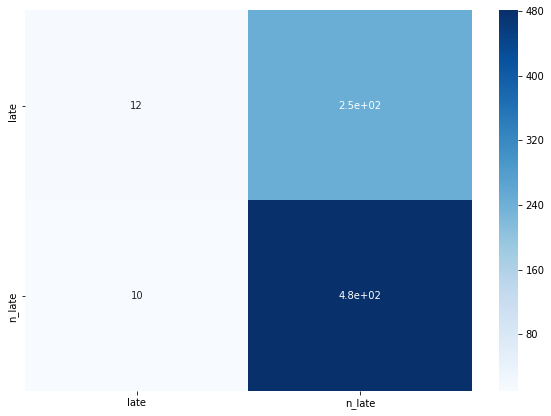

Test data prediction Confusion Matrix


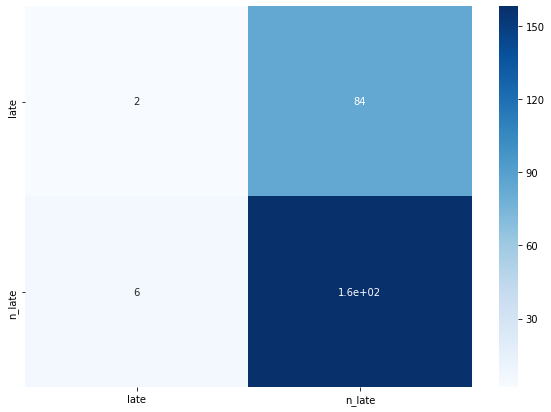

In [436]:
# Fit the model (logistic Regression) 
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

train_pred_l = model.predict(X_train)

# Run the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1] 

#Prediction and Metrics
metrics_l_train = calculate_metrics(y_train,train_pred_l)
metrics_l_test = calculate_metrics(y_test,y_pred)

print('Training data prediction Confusion Matrix')

conf_mat(metrics_l_train)

print('Test data prediction Confusion Matrix')

conf_mat(metrics_l_test)





Next we Train the Random Forest ( with 200 trees) Algorithm and Predict the lateness of our test data using the trained algorithm 

Training data prediction Confusion Matrix


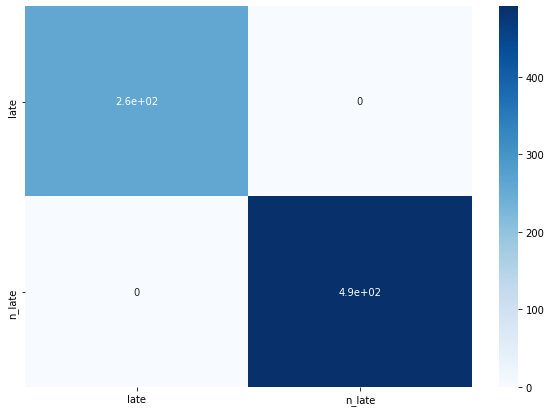

Test data prediction Confusion Matrix


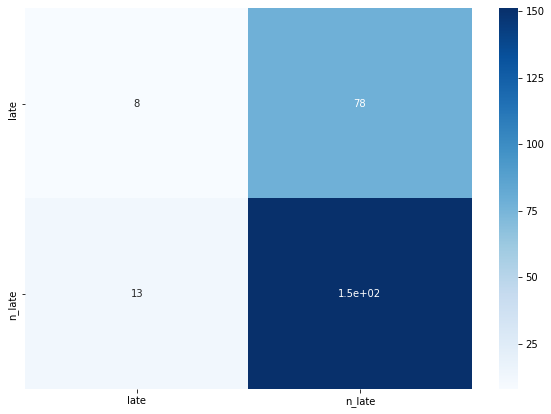

In [437]:
# build the model
# Fit the model
model = RandomForestClassifier(n_estimators=200,max_depth=50, random_state=14400)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)

# Run the model
y_pred_rf = model.predict(X_test)
y_prob_rf = model.predict_proba(X_test)[:,1]

metrics_rf_train = calculate_metrics(y_train,train_pred)
metrics_rf_test = calculate_metrics(y_test,y_pred_rf)

print('Training data prediction Confusion Matrix')
conf_mat(metrics_rf_train)


print('Test data prediction Confusion Matrix')
conf_mat(metrics_rf_test)

For both the algorithms, we will Plot and compare the three Evaluation Metrics (Accuracy,Precision and Recall) for both test and training data sets

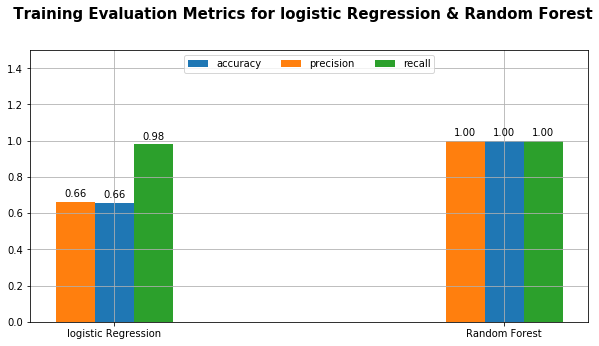

In [438]:
labels = ['logistic Regression', 'Random Forest']
accuracy = [metrics_l_train['accuracy'],metrics_rf_train['accuracy']]
precision = [metrics_l_train['precision'], metrics_rf_train['precision']]
recall = [metrics_l_train['recall'], metrics_rf_train['recall']]
         


x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , accuracy, width,label='accuracy')
rects2 = ax.bar(x - width, precision, width, label='precision')
rects3 = ax.bar(x + width, recall, width, label='recall')
ax.legend(loc=9,ncol=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticks([0,1])
ax.set_ylim(0,1.5)
#create a list of  variable names to use as labels for ticks in hor axis
xlab=[item.get_text() for item in ax.get_xticklabels()] # list with empty strings. list length determined my the ticks seen in the plots
# replace empty strings at even list indexes by variable names in the same order as they are present in the dataframe column names
xlab[0]='logistic Regression'
xlab[1]='Random Forest'

#set the vertical axis tick labels using the list created above
ax.set_xticklabels(xlab)
         
for tick in ax.get_xticklabels():
          tick.set_rotation(360)

#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(10,5)   
#Set a title for the figure
fig.suptitle(' Training Evaluation Metrics for logistic Regression & Random Forest'\
             ,y=1,fontsize=15,fontweight='bold')
plt.grid(True)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()          

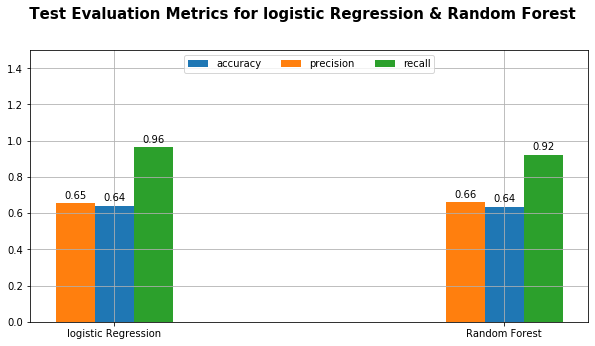

In [439]:
labels = ['logistic Regression', 'Random Forest']
accuracy = [metrics_l_test['accuracy'],metrics_rf_test['accuracy']]
precision = [metrics_l_test['precision'], metrics_rf_test['precision']]
recall = [metrics_l_test['recall'], metrics_rf_test['recall']]
         


x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , accuracy, width,label='accuracy')
rects2 = ax.bar(x - width, precision, width, label='precision')
rects3 = ax.bar(x + width, recall, width, label='recall')
ax.legend(loc=9,ncol=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticks([0,1])
ax.set_ylim(0,1.5)
#create a list of  variable names to use as labels for ticks in hor axis
xlab=[item.get_text() for item in ax.get_xticklabels()] # list with empty strings. list length determined my the ticks seen in the plots
# replace empty strings at even list indexes by variable names in the same order as they are present in the dataframe column names
xlab[0]='logistic Regression'
xlab[1]='Random Forest'

#set the vertical axis tick labels using the list created above
ax.set_xticklabels(xlab)
         
for tick in ax.get_xticklabels():
          tick.set_rotation(360)

#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(10,5)   
#Set a title for the figure
fig.suptitle(' Test Evaluation Metrics for logistic Regression & Random Forest'\
             ,y=1,fontsize=15,fontweight='bold')
plt.grid(True)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()          

Looking at the evaluation Metrics, it is evident that Random Forest algorithm is able to learn and generalize well from the training data. This is seen from both the confusion Matrix we plotted and also from the value of the three evaluation metrics. Which might mean that the Random Forest model is overfitting our test data. But, when we look at the values of the evaluation metrics for the test data, both the algorithms seem to preform on similar levels. Therefore it is still difficult for us to identify one model as the best, from these evaluation metrics. Therefore, we will finally plot the Receiver operating characteristic (ROC) curve for both the models. Theoritically, the more area covered in the ROC curve by a particular algorithm hints towards a better preformance.  

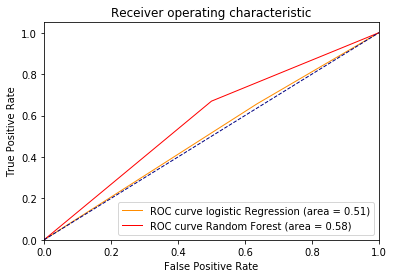

In [373]:
#roc curve for test data

#roc logistic
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

# roc random Forest

fpr_r, tpr_r, thresholds_r = roc_curve(y_pred_rf, y_test)
roc_auc_r = auc(fpr_r, tpr_r)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve logistic Regression (area = %0.2f)' % roc_auc)
plt.plot(fpr_r, tpr_r, color='red', lw=1, label='ROC curve Random Forest (area = %0.2f)' % roc_auc_r)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the Random Forest Model shows a greater area coverage compared to the LOgistic Regression Model. The preformance of both these models can be further improved with techniques of Cross-Validation, Feature extraction and dealing with class imbalance. 